Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

Importing Data

In [3]:
Apple=pd.read_csv('AAPL (1).csv')
Apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


Observaton:-

Open:-It is the price at which the stock is first traded.

High:-It is the price of a stock which is highest price of the day.

Low:-It is the price of a stock which is lowest price of the day.

Close:-It is the price at which the price is last traded.

Adj Close:-It is the price of the stock which has been traded after market hours by the brokers so that the unfilled orders get filled.

Volume:-The total number of shares traded in that perticular day.

In [4]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


Converting the Dtype of Date column from object to datetime and indexing it

In [5]:
Apple['Date'] = pd.to_datetime(Apple['Date'])

In [6]:
Apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


Visualisating the data

In [7]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.1 MB/s eta 0:00:00


In [8]:
import plotly.express as px
fig = px.line(Apple,Apple['Date'],Apple['Adj Close'], title='Apple chart Slider')#x='Date', y='Adj Close'

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Indexing the Dates

In [9]:
Apple=Apple.set_index('Date')

In [10]:
Apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


Candlestick chart of the dataset

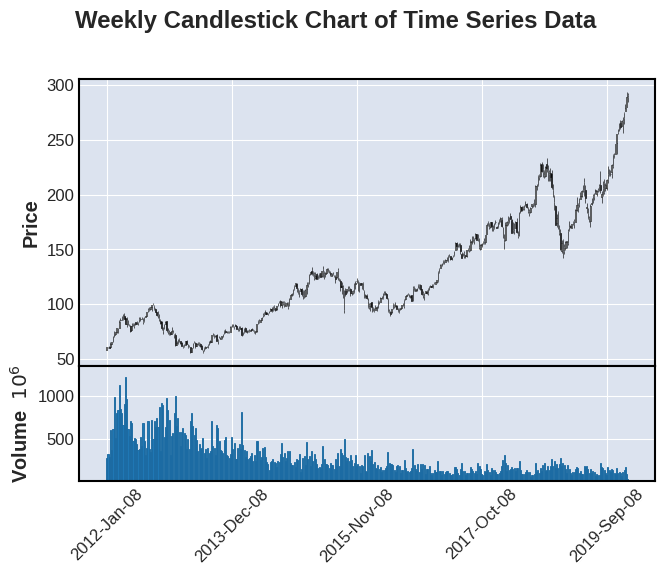

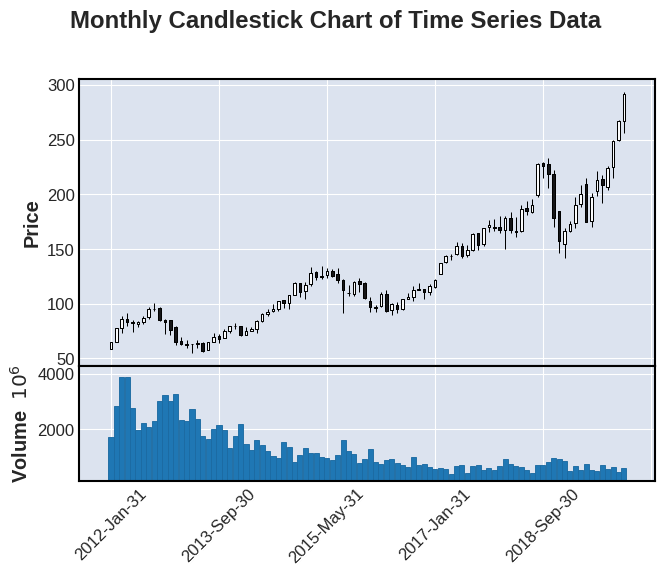

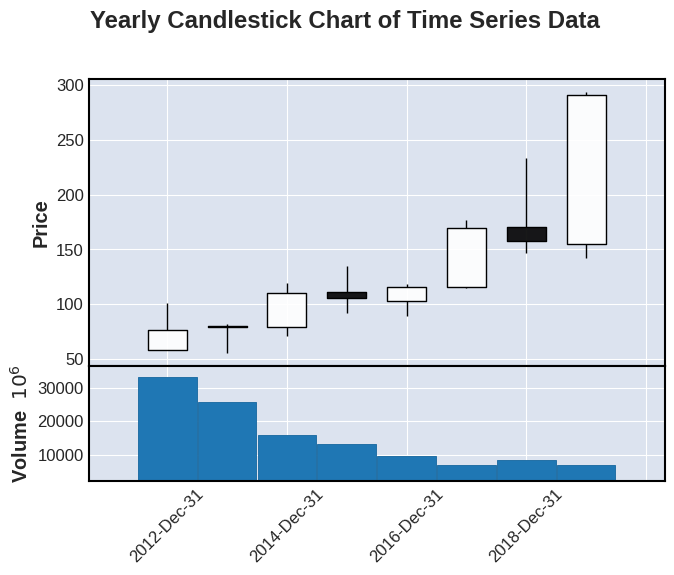

In [11]:
import mplfinance as mpf
import matplotlib as mpl

# Resample data on a weekly basis
weekly_data =Apple.resample('W').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

# Resample data on a monthly basis
monthly_data =Apple.resample('M').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

# Resample data on a yearly basis
yearly_data =Apple.resample('Y').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

# Create a candlestick chart of the weekly data
mpf.plot(weekly_data, type='candle', volume=True, title='Weekly Candlestick Chart of Time Series Data')

# Create a candlestick chart of the monthly data
mpf.plot(monthly_data, type='candle', volume=True, title='Monthly Candlestick Chart of Time Series Data')

# Create a candlestick chart of the yearly data
mpf.plot(yearly_data, type='candle', volume=True, title='Yearly Candlestick Chart of Time Series Data')


# Exploratory data analysis

In [12]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


Though the data does not have any null values we are including the days on which there was a holiday because the models expects the data to be in such a way that all the weekdays are present in the data, this for getting the good Forecast of the prices.

Generating the dates

In [13]:
idx = pd.date_range('2012-01-03','2019-12-31')
idx

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               '2012-01-11', '2012-01-12',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=2920, freq='D')

Eliminating the weekends dates

In [14]:
filtered_date_index = idx[idx.weekday <5]
filtered_date_index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-16',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=2086, freq=None)

Reindexing with the weekdays and replacing the reindexed prices as NaN

In [15]:
Apple1= Apple.reindex(filtered_date_index, fill_value=np.nan)
Apple1.head(50)

,Open,High,Low,Close,Adj Close,Volume
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200.0
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500.0
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400.0
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200.0
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100.0
2012-01-10,60.844284,60.857143,60.214287,60.462856,52.248333,64549100.0
2012-01-11,60.382858,60.407143,59.901428,60.364285,52.163139,53771200.0
2012-01-12,60.325714,60.414288,59.821430,60.198570,52.019955,53146800.0
2012-01-13,59.957142,60.064285,59.808571,59.972858,51.824898,56505400.0
2012-01-16,NaN,NaN,NaN,NaN,NaN,NaN


Since Volume is of no use we dop it from our data frame

In [16]:
df=Apple1.drop('Volume',axis=1)
df

,Open,High,Low,Close,Adj Close
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932
...,...,...,...,...,...
2019-12-25,NaN,NaN,NaN,NaN,NaN
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614


In [17]:
Apple1.shape

(2086, 6)

In [18]:
Apple1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2086 entries, 2012-01-03 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   float64
dtypes: float64(6)
memory usage: 114.1 KB


we see that there are 75 null values and we replace them by the rolling mean

In [19]:
window_size = 10

# Calculate the rolling mean and fill null values with the mean
rolling_mean = df['Adj Close'].rolling(window_size, min_periods=3).mean()
df['Adj_close_imp'] = df['Adj Close'].fillna(rolling_mean)
df_imp = pd.DataFrame(df)
df_imp.head(50)

,Open,High,Low,Close,Adj Close,Adj_close_imp
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,50.765709
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,51.038536
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,51.605175
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,52.144630
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,52.061932
2012-01-10,60.844284,60.857143,60.214287,60.462856,52.248333,52.248333
2012-01-11,60.382858,60.407143,59.901428,60.364285,52.163139,52.163139
2012-01-12,60.325714,60.414288,59.821430,60.198570,52.019955,52.019955
2012-01-13,59.957142,60.064285,59.808571,59.972858,51.824898,51.824898
2012-01-16,NaN,NaN,NaN,NaN,NaN,51.763590


<Axes: >

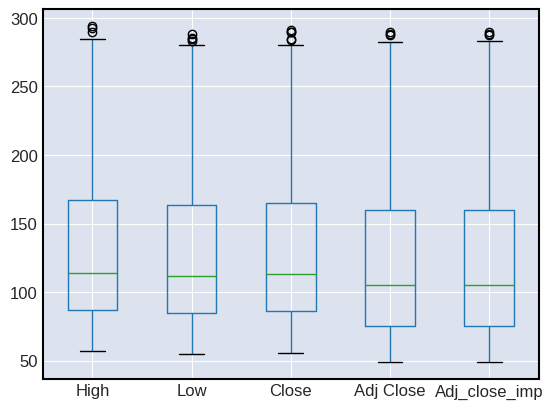

In [20]:
df_imp.iloc[:,1:7].boxplot()

As see that Open,High,Low,Close contain similar information by visulasing the box plots,we use the Adj_close in the model because it is the lastest traded price,so the missing values are calculated for only that specific column.

In [21]:
df_imp['Adj_close_imp'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2086 entries, 2012-01-03 to 2019-12-31
Series name: Adj_close_imp
Non-Null Count  Dtype  
--------------  -----  
2086 non-null   float64
dtypes: float64(1)
memory usage: 32.6 KB


Visluising the Weekly monthly and Yearly trends

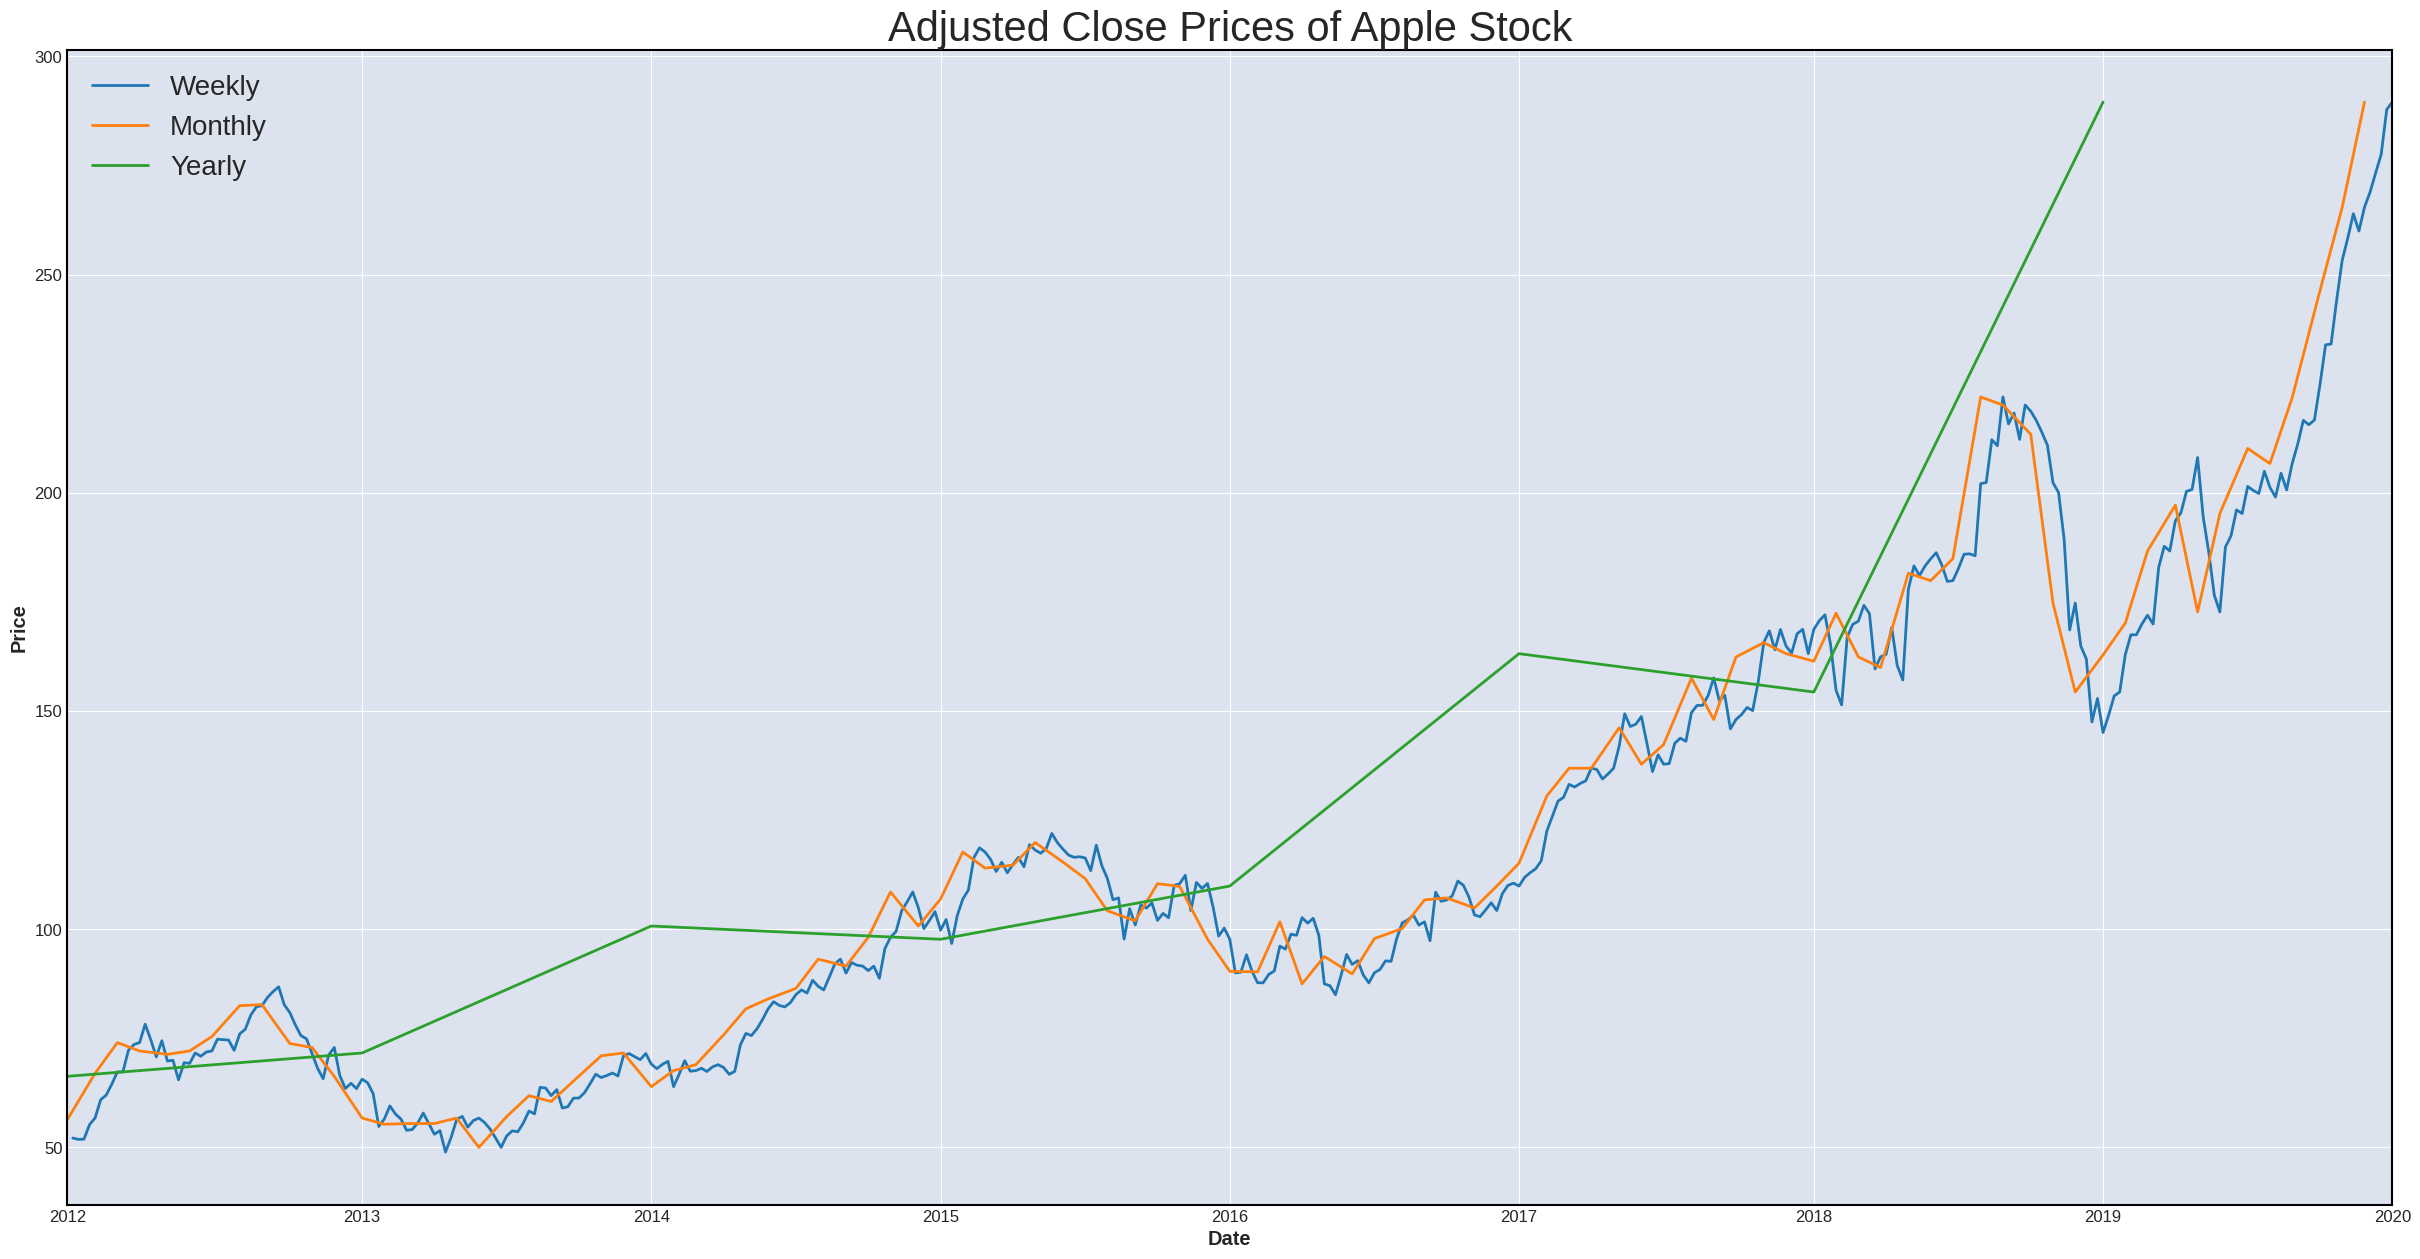

In [22]:
# Resample data on a weekly basis and select the last adjusted close price
weekly_close_prices =df_imp['Adj Close'].resample('W').last()

# Resample data on a monthly basis and select the last adjusted close price
monthly_close_prices =df_imp['Adj Close'].resample('M').last()

# Resample data on a yearly basis and select the last adjusted close price
yearly_close_prices =df_imp['Adj Close'].resample('Y').last()

# Create a figure with a size of 30x15 inches
plt.figure(figsize=(30,15))

# Plot the weekly, monthly, and yearly adjusted close prices
weekly_close_prices.plot(label='Weekly')
monthly_close_prices.plot(label='Monthly')
yearly_close_prices.plot(label='Yearly')

# Add a title and axis labels to the plot
plt.title('Adjusted Close Prices of Apple Stock',size=30)
plt.xlabel('Date')
plt.ylabel('Price')

# Add a legend to the plot
legend = plt.legend(fontsize=20)

# Show the plot
plt.show()

# Exploratory Data Analysis

Checkings for outliers in the data

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb868668e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb868669390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb868668bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb8686698d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb868669b70>],
 'means': []}

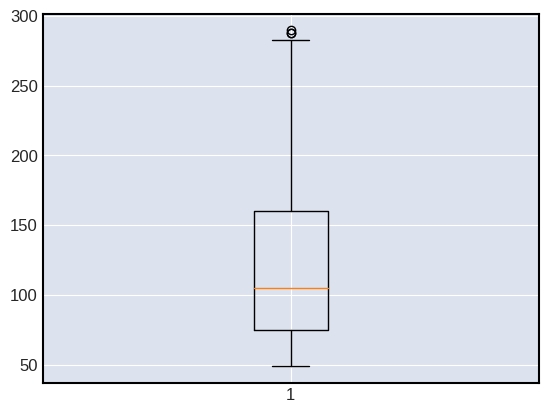

In [23]:
plt.boxplot(df_imp['Adj_close_imp'])
#df_imp..boxplot()

As there are outliers and more variability in the data we transform the data into Log

In [24]:
df=np.log(df_imp['Adj_close_imp'])
df
df=pd.DataFrame(df)
df

,Adj_close_imp
2012-01-03,3.927221
2012-01-04,3.932581
2012-01-05,3.943622
2012-01-06,3.954021
2012-01-09,3.952434
...,...
2019-12-25,5.625670
2019-12-26,5.662695
2019-12-27,5.662316
2019-12-30,5.668233


<Axes: >

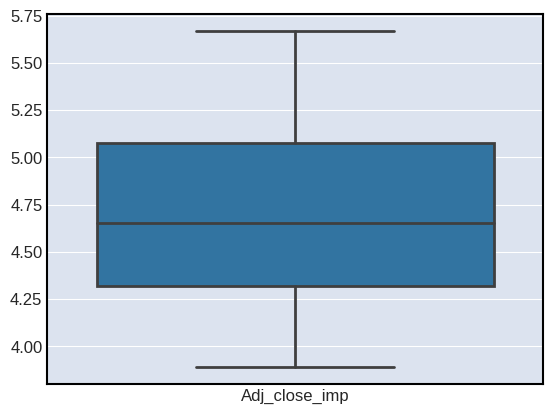

In [25]:
sns.boxplot(data=df)

Observation:-we can see that the variability in prices of the stock are controlled and the  outliers are removed

In [26]:
df0=pd.DataFrame(df['Adj_close_imp'])
df0

,Adj_close_imp
2012-01-03,3.927221
2012-01-04,3.932581
2012-01-05,3.943622
2012-01-06,3.954021
2012-01-09,3.952434
...,...
2019-12-25,5.625670
2019-12-26,5.662695
2019-12-27,5.662316
2019-12-30,5.668233


In [27]:
df0.index = pd.date_range(start=df0.index[0], end=df0.index[-1], freq='B')
df0

,Adj_close_imp
2012-01-03,3.927221
2012-01-04,3.932581
2012-01-05,3.943622
2012-01-06,3.954021
2012-01-09,3.952434
...,...
2019-12-25,5.625670
2019-12-26,5.662695
2019-12-27,5.662316
2019-12-30,5.668233


Plotting the chart of the stock after log transformation

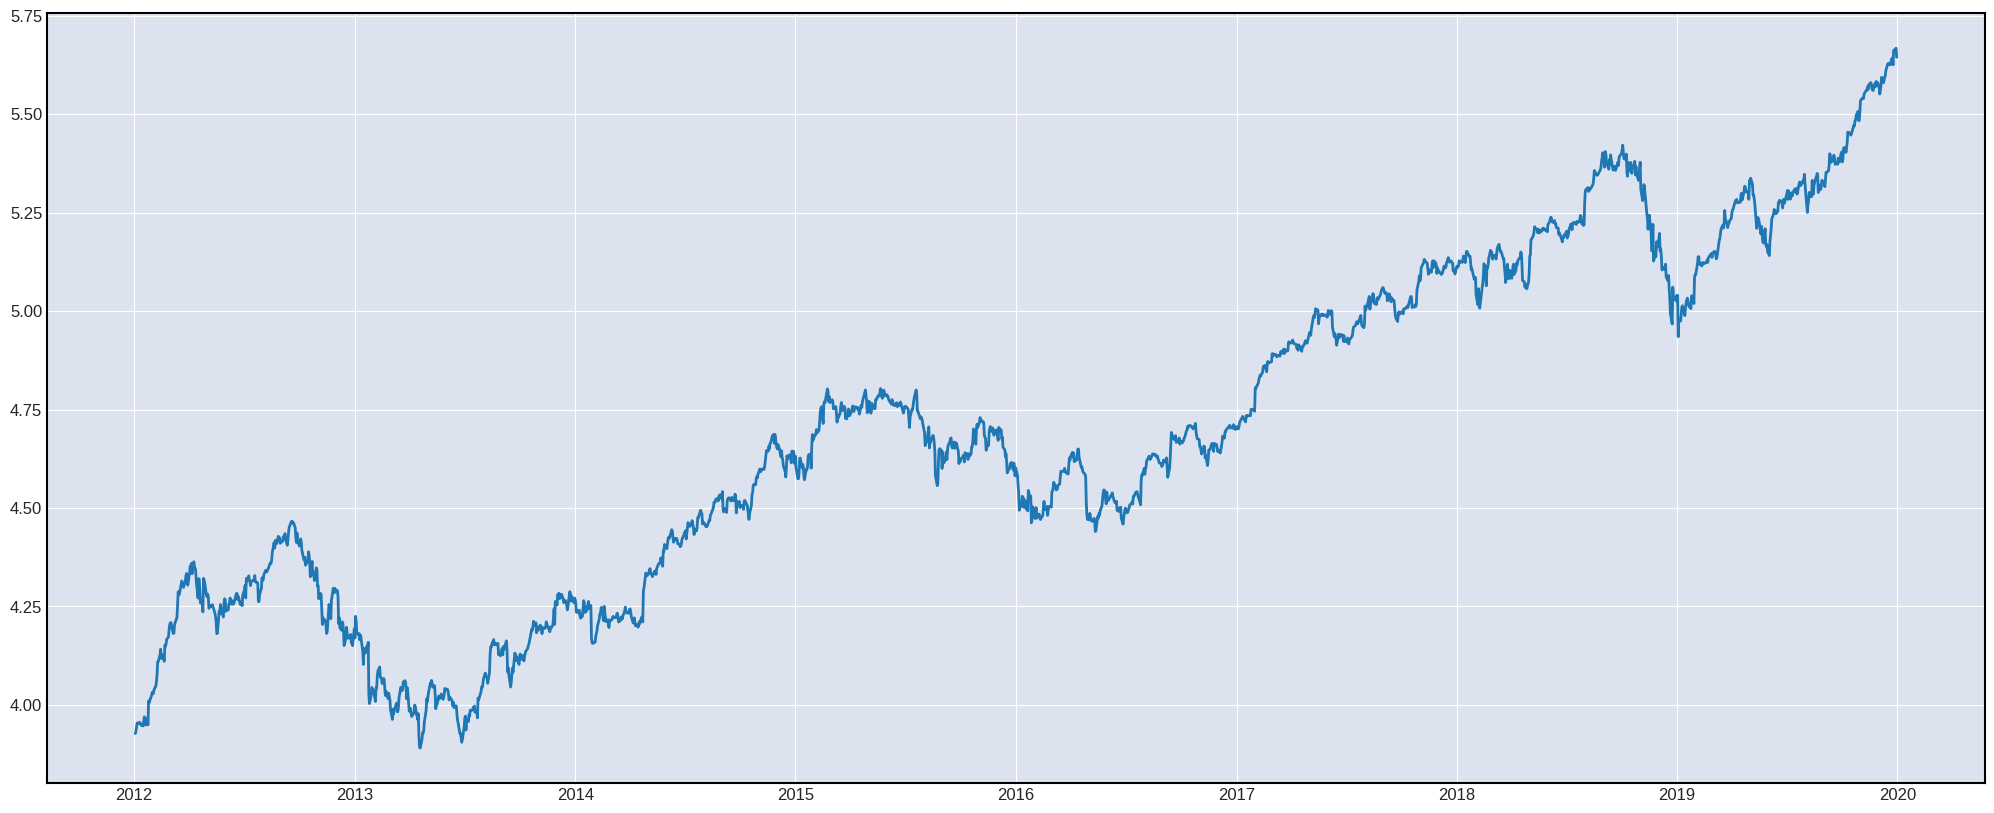

In [28]:
plt.figure(figsize=(25,10))
plt.plot(df0)

Train Test Split

In [29]:
train =df0[:1670]
test = df0[1670:]

# Check the size of train and test sets
print('Train size:', len(train))
print('Test size:', len(test))

Train size: 1670
Test size: 416


In [30]:
train.index = pd.date_range(start=train.index[0], end=train.index[-1], freq='B')
train

,Adj_close_imp
2012-01-03,3.927221
2012-01-04,3.932581
2012-01-05,3.943622
2012-01-06,3.954021
2012-01-09,3.952434
...,...
2018-05-22,5.203191
2018-05-23,5.209583
2018-05-24,5.208467
2018-05-25,5.210750


In [31]:
test.index = pd.date_range(start=test.index[0], end=test.index[-1], freq='B')
test

,Adj_close_imp
2018-05-29,5.207137
2018-05-30,5.205006
2018-05-31,5.201641
2018-06-01,5.219514
2018-06-04,5.227837
...,...
2019-12-25,5.625670
2019-12-26,5.662695
2019-12-27,5.662316
2019-12-30,5.668233


Decomposing the data

Now we decompose the time series into its component:
1.Trend component
2.Seasonality
3.Residuals

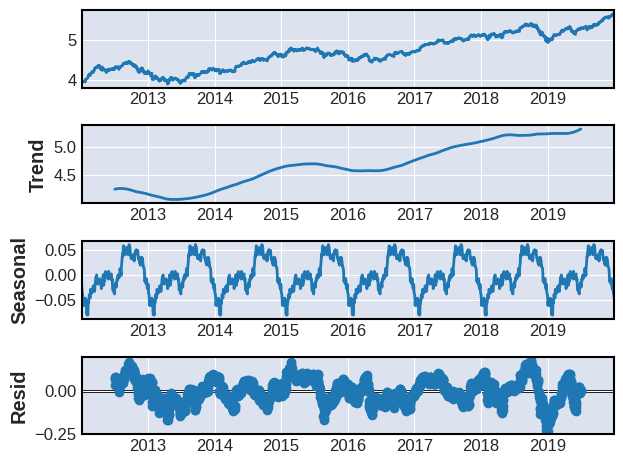

In [32]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df0, model='additive', period=260)
decomposition.plot();

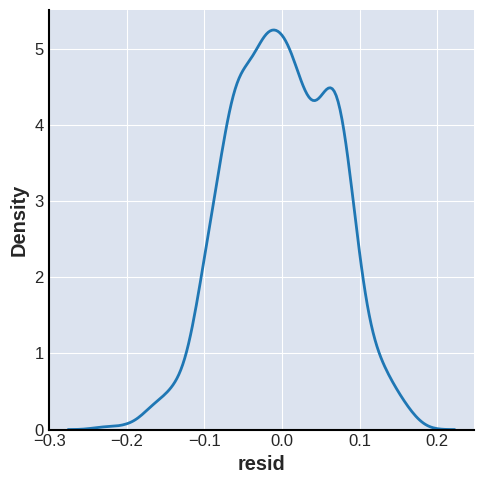

In [33]:
sns.displot(decomposition .resid,kind='kde')

# Applying Holt winters model

# Hyperparameter Tuning

In [34]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error

# Split the time series data into training and validation sets
train_size = 1670
train, val = train, test

# Define the parameter grid for grid search
param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              'beta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

# Perform grid search using cross-validation with the L-BFGS-B method
best_score = float('inf')
for alpha in param_grid['alpha']:
    for beta in param_grid['beta']:
        for gamma in param_grid['gamma']:
            model = ExponentialSmoothing(train, trend='add', damped=False, seasonal='add', seasonal_periods=260)
            fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma, optimized=False)
            preds = fit.forecast(len(val))
            score = mean_absolute_percentage_error(val, preds)
            if score < best_score:
                best_score = score
                best_alpha = alpha
                best_beta = beta
                best_gamma = gamma

# Print the optimal values of alpha, beta, and gamma
print("Optimal alpha:", best_alpha)
print("Optimal beta:", best_beta)
print("Optimal gamma:", best_gamma)


Optimal alpha: 0.4
Optimal beta: 0.1
Optimal gamma: 0.2


# Building model with Best Hyperparameters

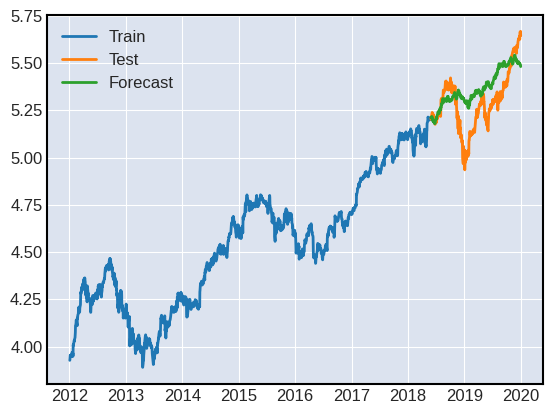

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the parameters for the Holt-Winters model
alpha = 0.4  # smoothing parameter for level
beta = 0.1   # smoothing parameter for trend
gamma = 0.2  # smoothing parameter for seasonality
season_length =260  # length of seasonal cycle

# Fit the Holt-Winters model to the data
model1 = ExponentialSmoothing(train, seasonal_periods=season_length, trend='add', seasonal='add')
fitted_model1 = model1.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Make predictions using the Holt-Winters model
forecast4 = fitted_model1.forecast(steps=416)

# Plot the original data and the forecasted values
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(forecast4.index, forecast4.values, label='Forecast')
plt.legend()
plt.show()

In [36]:
fitted_model1.summary()

Dep. Variable:,Adj_close_imp,No. Observations:,1670
Model:,ExponentialSmoothing,SSE,0.624
Optimized:,True,AIC,-12651.727
Trend:,Additive,BIC,-11220.694
Seasonal:,Additive,AICC,-12550.484
Seasonal Periods:,260,Date:,"Mon, 26 Jun 2023"
Box-Cox:,False,Time:,12:27:34
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4000000,alpha,False
smoothing_trend,0.1000000,beta,False


Checking the values for MAPE,MAE,RMSE

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# calculate MAPE
mape = np.mean(np.abs((np.array(np.exp(test.values)) - np.array(np.exp(forecast4.values))) / np.array(np.exp(test.values))) * 100)

# calculate MAE
mae = mean_absolute_error(np.exp(test.values), np.exp(forecast4.values))

# calculate RMSE
rmse = np.sqrt(mean_squared_error(np.exp(test.values), np.exp(forecast4.values)))

# print the results
print("MAPE:", mape)
print("MAE:", mae)
print("RMSE:", rmse)

MAPE: 16.611884564357936
MAE: 22.16021885931162
RMSE: 26.530841554429976


# Building model with trial and test method


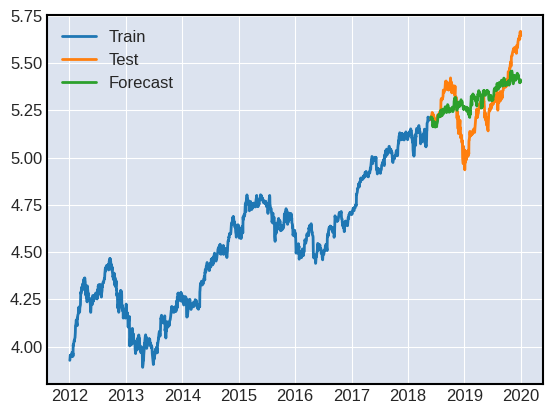

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the parameters for the Holt-Winters model
alpha = 0.2  # smoothing parameter for level
beta = 0.15   # smoothing parameter for trend
gamma = 0.65 # smoothing parameter for seasonality
season_length =260  # length of seasonal cycle

# Fit the Holt-Winters model to the data
model2 = ExponentialSmoothing(train, seasonal_periods=season_length, trend='add', seasonal='add')
fitted_model2 = model2.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Make predictions using the Holt-Winters model
forecast2 = fitted_model2.forecast(steps=416)

# Plot the original data and the forecasted values
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(forecast2.index, forecast2.values, label='Forecast')
plt.legend()
plt.show()

In [39]:
fitted_model2.summary()

Dep. Variable:,Adj_close_imp,No. Observations:,1670
Model:,ExponentialSmoothing,SSE,1.245
Optimized:,True,AIC,-11499.031
Trend:,Additive,BIC,-10067.998
Seasonal:,Additive,AICC,-11397.788
Seasonal Periods:,260,Date:,"Mon, 26 Jun 2023"
Box-Cox:,False,Time:,12:27:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
smoothing_trend,0.1500000,beta,False


Checking the values for MAPE,MAE,RMSE

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# calculate MAPE
mape = np.mean(np.abs((np.array(np.exp(test.values)) - np.array(np.exp(forecast2.values))) / np.array(np.exp(test.values))) * 100)

# calculate MAE
mae = mean_absolute_error(np.exp(test.values), np.exp(forecast2.values))

# calculate RMSE
rmse = np.sqrt(mean_squared_error(np.exp(test.values), np.exp(forecast2.values)))

# print the results
print("MAPE:", mape)
print("MAE:", mae)
print("RMSE:", rmse)

MAPE: 13.57670095361443
MAE: 19.807266088209506
RMSE: 24.51990006167564


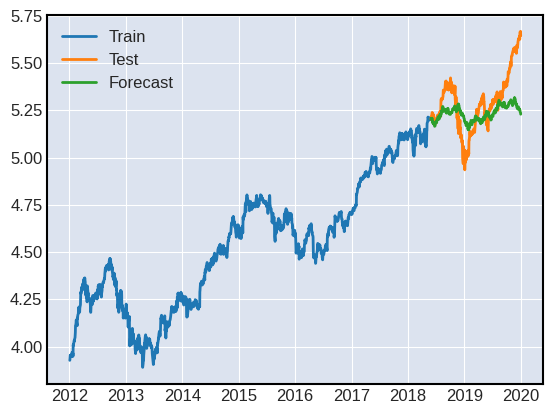

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the parameters for the Holt-Winters model
alpha = 0.4  # smoothing parameter for level
beta = 0.45   # smoothing parameter for trend
gamma = 0.15 # smoothing parameter for seasonality
season_length =260  # length of seasonal cycle

# Fit the Holt-Winters model to the data
model3 = ExponentialSmoothing(train, seasonal_periods=season_length, trend='add', seasonal='add')
fitted_model3 = model3.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Make predictions using the Holt-Winters model
forecast2 = fitted_model3.forecast(steps=416)

# Plot the original data and the forecasted values
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(forecast2.index, forecast2.values, label='Forecast')
plt.legend()
plt.show()

Checking the values for MAPE,MAE,RMSE

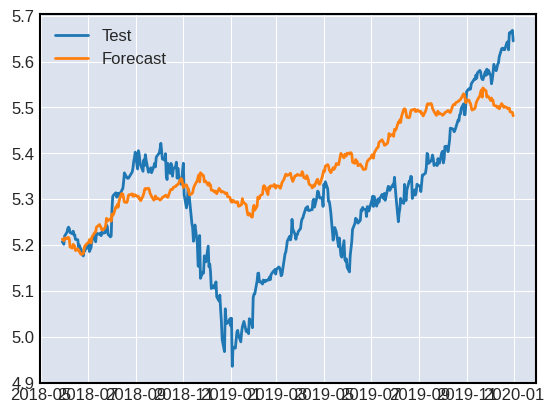

MAPE: 12.070693564127069
MAE: 21.583836683361717
RMSE: 29.576065186284158


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# calculate MAPE
mape = np.mean(np.abs((np.array(np.exp(test.values)) - np.array(np.exp(forecast2.values))) / np.array(np.exp(test.values))) * 100)

# calculate MAE
mae = mean_absolute_error(np.exp(test.values), np.exp(forecast2.values))

# calculate RMSE
rmse = np.sqrt(mean_squared_error(np.exp(test.values), np.exp(forecast2.values)))
#plt.plot(train.index, train.values, label='Test')
plt.plot(test.index, test.values, label='Test')
plt.plot(forecast4.index, forecast4.values, label='Forecast')
plt.legend()
plt.show()
# print the results
print("MAPE:", mape)
print("MAE:", mae)
print("RMSE:", rmse)

Since after trying with several alpha, beta,and gamma values we have imroved loss function for our model, so the parameters for the model will be,
Optimized alpha: 0.4,
Optimized beta: 0.45,
Optimized gamma: 0.15.

# Predicting the prices for next 30 days and plotting them

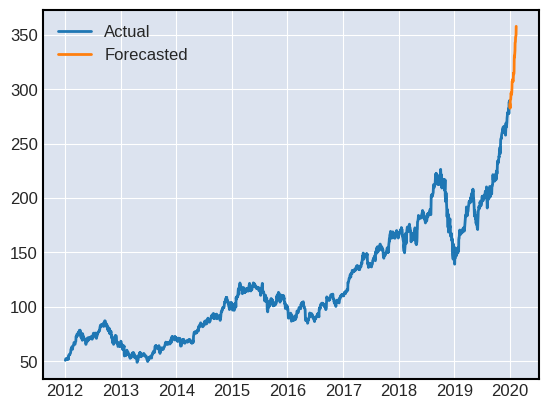

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the parameters for the Holt-Winters model
alpha = 0.5 # smoothing parameter for level
beta = 0.45   # smoothing parameter for trend
gamma = 0.15  # smoothing parameter for seasonality
season_length =260  # length of seasonal cycle

# Fit the Holt-Winters model to the data
model = ExponentialSmoothing(df0, seasonal_periods=season_length, trend='additive', seasonal='add')
fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Make predictions using the Holt-Winters model
forecast = fitted_model.forecast(steps=30)

# Plot the original data and the forecasted values
plt.plot(df0.index, np.exp(df0.values), label='Actual')
plt.plot(forecast.index, np.exp(forecast.values), label='Forecasted')
plt.legend()
plt.show()

In [47]:
last=df0['2019':]
last1=np.exp(last)
last1

,Adj_close_imp
2019-01-01,151.973642
2019-01-02,154.516388
2019-01-03,139.125412
2019-01-04,145.064575
2019-01-07,144.741714
...,...
2019-12-25,277.458069
2019-12-26,287.923645
2019-12-27,287.814392
2019-12-30,289.522614


Enlarged view of the plot

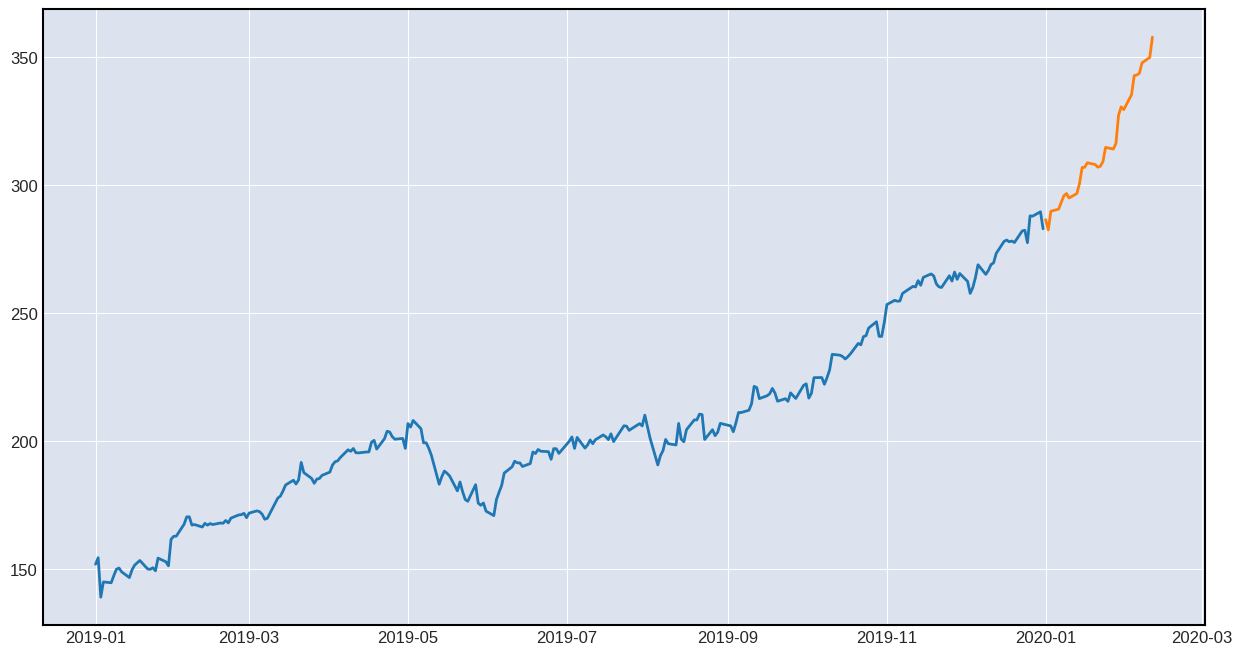

In [48]:
plt.figure(figsize=(15,8))
plt.plot(last1.index,last1.values)
plt.plot(forecast.index, np.exp(forecast.values))

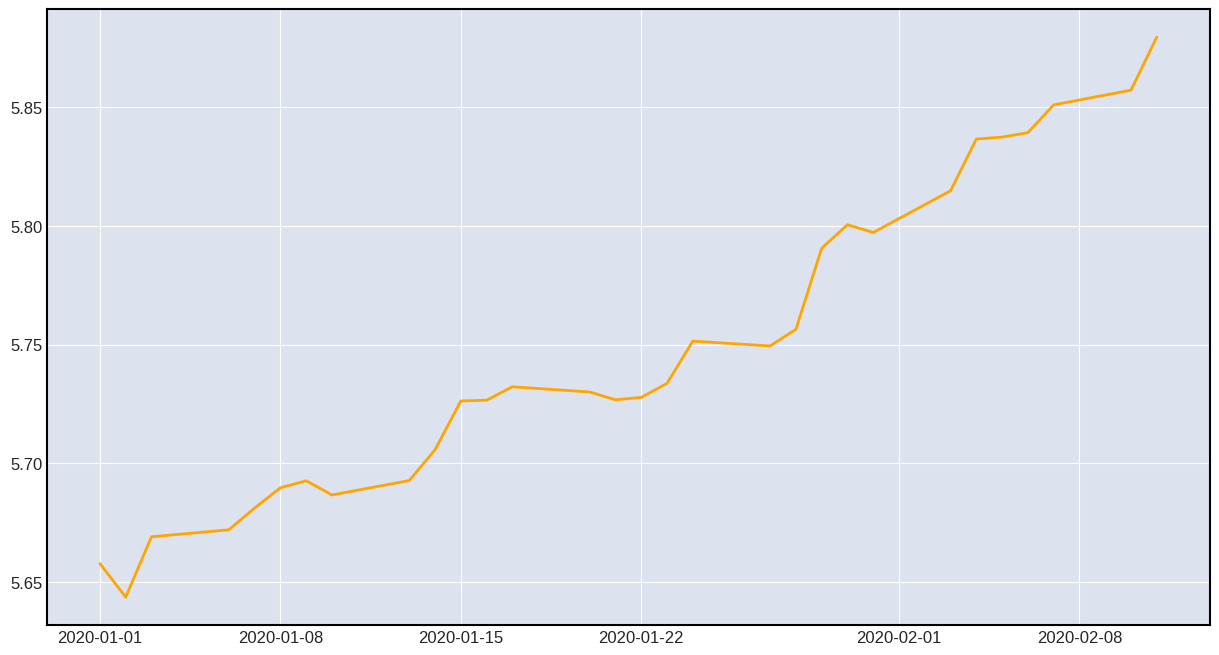

In [49]:
plt.figure(figsize=(15,8))
plt.plot(forecast.index,forecast.values,color="orange")

In [50]:
import pickle
#pickle.dump(tfidf_vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(fitted_model,open('model.pkl','wb'))

In [51]:
pip freeze

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.7.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
array-record==0.3.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
attrs==23.1.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
build==0.10.0
CacheControl==0.13.1
cached-property==1.5.2
cachetools==5.3.1
catalogue==2.0.8
certifi==2023.5.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.1.0
convertdate==2.4.0
cryptography==41.0.1
cufflinks==0.17.3
cvxopt==1.3.1
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.35
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
dist